In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data = df.values

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data[:,:-1]=sc.fit_transform(data[:,:-1])

In [5]:
print(data)

[[-0.41978194  0.28482986 -1.2879095  ...  0.44105193 -1.0755623
  24.        ]
 [-0.41733926 -0.48772236 -0.59338101 ...  0.44105193 -0.49243937
  21.6       ]
 [-0.41734159 -0.48772236 -0.59338101 ...  0.39642699 -1.2087274
  34.7       ]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  0.44105193 -0.98304761
  23.9       ]
 [-0.40776407 -0.48772236  0.11573841 ...  0.4032249  -0.86530163
  22.        ]
 [-0.41500016 -0.48772236  0.11573841 ...  0.44105193 -0.66905833
  11.9       ]]


In [6]:
X=data[:,:-1].T.copy()
print(X.shape)

(13, 506)


In [7]:
Y=data[:,-1].T.copy().reshape(1,-1)
print(Y.shape)

(1, 506)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X.T,Y.T)

In [9]:
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(13, 379) (1, 379)
(13, 127) (1, 127)


In [10]:
# initilaising weights
w=np.random.randn(1,X_train.shape[0])*0.01

In [11]:
print(w, w.shape)

[[ 0.00123036 -0.0187913   0.00013646 -0.02407131  0.00074084 -0.00319424
  -0.0017382   0.01304816  0.00107895  0.0221544   0.00220812  0.01011685
   0.00066363]] (1, 13)


In [12]:
b = 0

In [13]:
def compute_cost(y, y_hat):
    return np.sqrt(np.sum((y-y_hat)**2, axis =1)/y.shape[1])

In [14]:
def forward_prop(w,X,b):
    y_hat = np.dot(w,X)+b
    return y_hat

In [15]:
def compute_grad(y,y_hat,A0):
    m = y.shape[1]
    dw = (y_hat-y).dot(A0.T)*2/m
    db = np.sum((y_hat-y), axis =1, keepdims=True)*2/m
    return dw, db

In [16]:
def back_prop(w,b,alpha,dw,db):
    w = w - alpha*dw
    b = b - alpha*db
    return w, b

In [17]:
def test():
    for i in range(5):
        print(b)
test()

0
0
0
0
0


In [18]:
train_costs=[]
test_costs=[]
def lin_reg_model(alpha, no_of_iter, X, Y, w, b):
    costs=[]
    for i in range(no_of_iter):
        y_hat = forward_prop(w, X, b)
        costs+=[compute_cost(Y,y_hat)]
        dw, db = compute_grad(Y,y_hat,X)
        w, b = back_prop(w,b,alpha,dw,db)
        print(f"Iteration no {i+1} over")
    return costs, w ,b, y_hat

In [19]:
train_costs, w_final, b_final, Y_train_pred = lin_reg_model(0.01, 1000, X_train, Y_train, w, b)

Iteration no 1 over
Iteration no 2 over
Iteration no 3 over
Iteration no 4 over
Iteration no 5 over
Iteration no 6 over
Iteration no 7 over
Iteration no 8 over
Iteration no 9 over
Iteration no 10 over
Iteration no 11 over
Iteration no 12 over
Iteration no 13 over
Iteration no 14 over
Iteration no 15 over
Iteration no 16 over
Iteration no 17 over
Iteration no 18 over
Iteration no 19 over
Iteration no 20 over
Iteration no 21 over
Iteration no 22 over
Iteration no 23 over
Iteration no 24 over
Iteration no 25 over
Iteration no 26 over
Iteration no 27 over
Iteration no 28 over
Iteration no 29 over
Iteration no 30 over
Iteration no 31 over
Iteration no 32 over
Iteration no 33 over
Iteration no 34 over
Iteration no 35 over
Iteration no 36 over
Iteration no 37 over
Iteration no 38 over
Iteration no 39 over
Iteration no 40 over
Iteration no 41 over
Iteration no 42 over
Iteration no 43 over
Iteration no 44 over
Iteration no 45 over
Iteration no 46 over
Iteration no 47 over
Iteration no 48 over
I

Iteration no 941 over
Iteration no 942 over
Iteration no 943 over
Iteration no 944 over
Iteration no 945 over
Iteration no 946 over
Iteration no 947 over
Iteration no 948 over
Iteration no 949 over
Iteration no 950 over
Iteration no 951 over
Iteration no 952 over
Iteration no 953 over
Iteration no 954 over
Iteration no 955 over
Iteration no 956 over
Iteration no 957 over
Iteration no 958 over
Iteration no 959 over
Iteration no 960 over
Iteration no 961 over
Iteration no 962 over
Iteration no 963 over
Iteration no 964 over
Iteration no 965 over
Iteration no 966 over
Iteration no 967 over
Iteration no 968 over
Iteration no 969 over
Iteration no 970 over
Iteration no 971 over
Iteration no 972 over
Iteration no 973 over
Iteration no 974 over
Iteration no 975 over
Iteration no 976 over
Iteration no 977 over
Iteration no 978 over
Iteration no 979 over
Iteration no 980 over
Iteration no 981 over
Iteration no 982 over
Iteration no 983 over
Iteration no 984 over
Iteration no 985 over
Iteration 

In [20]:
print(train_costs[-1])

[4.65884845]


In [21]:
x_axis=[i for i in range(len(train_costs))]

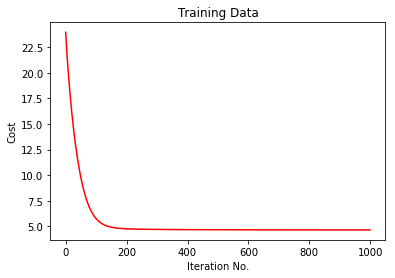

In [22]:
plt.plot(x_axis, train_costs, color='red')
plt.xlabel("Iteration No.")
plt.ylabel("Cost")
plt.title("Training Data")
plt.show()

In [23]:
print(w_final,b_final)

[[-1.02763325  0.95071703 -0.34838775  0.83838976 -1.55311918  2.55736407
   0.03672946 -2.90370517  1.93713777 -1.01945972 -1.91110452  0.78946222
  -4.2689748 ]] [[22.48196979]]


In [24]:
Y_test_pred = forward_prop(w_final, X_test, b_final)
test_cost = compute_cost(Y_test, Y_test_pred)
print(test_cost)

[4.87917489]
